Refer to https://keras.io/preprocessing/image/

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np
import math
import os

Using TensorFlow backend.


In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

In [3]:
num_images = 6

In [4]:
trainX.shape

(60000, 28, 28)

Plot images

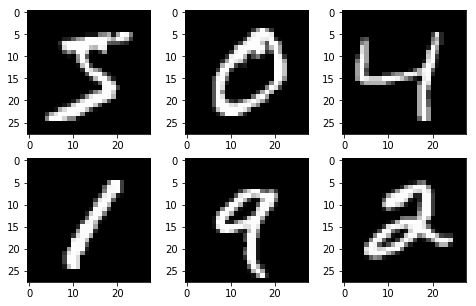

In [5]:
fig1 = plt.figure(figsize = (8,5))
for i in range(num_images):
    plt.subplot(int(math.ceil(num_images/4)),3, i + 1)
    plt.imshow(trainX[i,:].reshape(28, 28), cmap = 'gray')

Save Image

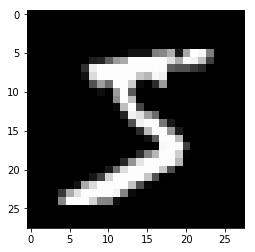

In [6]:
fig_ex = plt.figure()
plt.imshow(trainX[0].reshape(28,28), cmap = 'gray')

# flow_from_directory

To use 'flow_from_directory', images are stored in a folder tree with one separate subfolder per class

In [7]:
pwd = os.getcwd() # get current path
save_dir = pwd + '/image/' + str(trainY[0])
if not os.path.exists(save_dir): # if there is not path, make directory
    os.makedirs(save_dir)
fig_ex.savefig(save_dir + '/five.jpg')

In [8]:
data_generator = ImageDataGenerator(rotation_range=90, shear_range = 0.2, zoom_range = 0.2,horizontal_flip = True)

In [9]:
# target_size : images will be resized
data_gen = data_generator.flow_from_directory('./image', target_size = (100, 100), batch_size = 1, color_mode = 'grayscale')

Found 1 images belonging to 1 classes.


ImageDataGenrator apply to the image at random

(1, 100, 100, 1) (1, 1)
(1, 100, 100, 1) (1, 1)
(1, 100, 100, 1) (1, 1)
(1, 100, 100, 1) (1, 1)


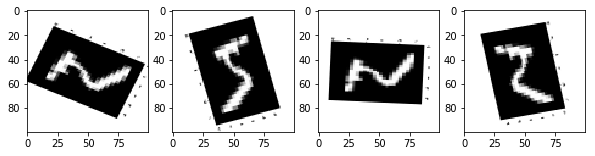

In [10]:
fig1 = plt.figure(figsize = (10,5))
for i in range(4):
    x_batch, y_batch = data_gen.next()
    print(x_batch.shape, y_batch.shape)
    plt.subplot(1, 4, i + 1)
    plt.imshow(x_batch.reshape(100, 100), cmap = 'gray')

# Image rotation, rescale

In [11]:
trainX.shape

(60000, 28, 28)

In [12]:
image_x = trainX.reshape(-1, 28, 28, 1) # expand imension
image_y = trainY[:]

In [13]:
data_generator = ImageDataGenerator(rescale = 1./255, rotation_range=90)

fit : only required if featurewise_center or featurewise_std_normalization or zca_whitening are set to True.

In [14]:
# data_generator.fit(image_x)

Why break use : Because it repeats infinitely, we need to specify the number of repetitions we want, so that it will exit at the specified number of iterations.

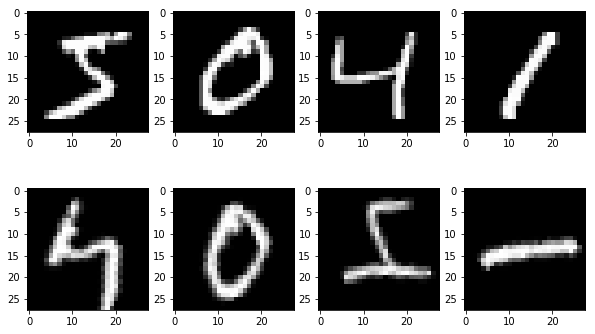

In [15]:
fig = plt.figure(figsize = (10,6))
for X, Y in data_generator.flow(image_x, image_y, batch_size = 4, shuffle = False):
    for i in range(4):
        plt.subplot(2, 4, i+1)
        plt.imshow(image_x[i].reshape(28, 28), cmap = 'gray')
        plt.subplot(2, 4, i+5)
        plt.imshow(X[i].reshape(28, 28), cmap = 'gray')
    break

In [16]:
X.shape

(4, 28, 28, 1)

In [17]:
# rescaled value 
print(np.max(X), np.min(X))
print(np.max(image_x), np.min(image_x))

0.99605143 0.0
255 0


# Image width, height shift

In [18]:
data_generator = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2)

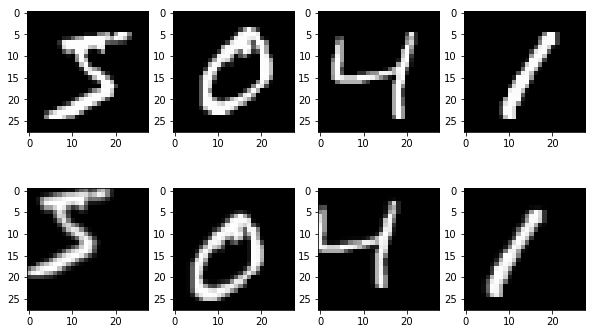

In [19]:
fig = plt.figure(figsize = (10,6))
for X, Y in data_generator.flow(image_x, image_y, batch_size = 4, shuffle = False):
    for i in range(4):
        plt.subplot(2, 4, i+1)
        plt.imshow(image_x[i].reshape(28, 28), cmap = 'gray')
        plt.subplot(2, 4, i+5)
        plt.imshow(X[i].reshape(28, 28), cmap = 'gray')
    break

# Image ZCA whitening

In [20]:
data_generator = ImageDataGenerator(zca_whitening = True)

C:\Users\masteryang\Anaconda3\envs\tensorflow35\lib\site-packages\keras_preprocessing\image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


### fit : Required if featurewise_center or featurewise_std_normalization or zca_whitening are set to True.

In [21]:
data_generator.fit(image_x)

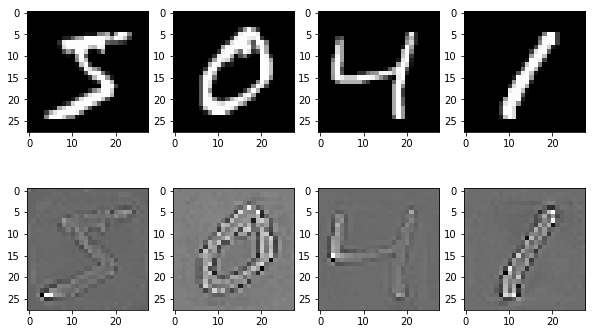

In [22]:
fig = plt.figure(figsize = (10,6))
for X, Y in data_generator.flow(image_x, image_y, batch_size = 4, shuffle = False):
    for i in range(4):
        plt.subplot(2, 4, i+1)
        plt.imshow(image_x[i].reshape(28, 28), cmap = 'gray')
        plt.subplot(2, 4, i+5)
        plt.imshow(X[i].reshape(28, 28), cmap = 'gray')
    break

# Apply image augmentation when trainig Neural Network

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [25]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [26]:
import keras
from keras import models
from keras.layers import Dense, Activation, Conv2D, Flatten
from keras.optimizers import Adam

In [27]:
def build_net():
    model = models.Sequential()
    model.add(Conv2D(16, (3,3), padding = 'same', input_shape = (28, 28, 1)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.001)
                          ,metrics = ['accuracy'])
    return model

In [28]:
mnist_net = build_net()

In [29]:
data_generator = ImageDataGenerator(
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2)

# fit
data_generator.fit(x_train)

In [30]:
train_generator = data_generator.flow(
                x_train,
                y_train,
                batch_size = 32)

fit_generator : fits the model on batches with real-time data augmentation when using imageDataGenerator function

steps_per_epoch : it means that how many batches are loaded for each epoch <br>
For example bellow<br>
steps_per_epoch = 60,000/32 = 1875 - ImageDataGenerator works 1875 times per epoch with 32 batches images<br>
batch_size = 32<br>
Mnist total is 60,000 = steps_per_epoch * batch_size<br>

In [31]:
# 1
mnist_net.fit_generator(train_generator, steps_per_epoch=x_train.shape[0] / 32, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 23s 12ms/step - loss: 0.9981 - acc: 0.6791 2s  
Epoch 2/2
1875/1875 [==============================] - 27s 14ms/step - loss: 0.6750 - acc: 0.7914


In [32]:
# 2 times images : 1875 -> 3750
mnist_net.fit_generator(train_generator, steps_per_epoch=x_train.shape[0] / 16, epochs = 2)

Epoch 1/2
3750/3750 [==============================] - 62s 17ms/step - loss: 0.5882 - acc: 0.8212
Epoch 2/2
3750/3750 [==============================] - 59s 16ms/step - loss: 0.4921 - acc: 0.8527
